In [1]:
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from uncertainties import ufloat

In [2]:
R = 498_000  # ohm


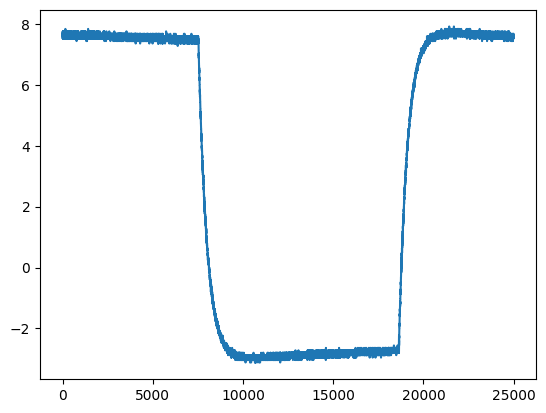

In [3]:
file = "./DS0028.CSV"

t, V = np.transpose(np.loadtxt(file, skiprows=16, delimiter=",", usecols=(0, 1)))

plt.plot(V)

In [17]:
def selectStart(t, V):
    s = 0
    count = 0
    for i, vol in enumerate(V):
        s += vol
        count += 1
        if s / count - vol > 0.4:
            return i

    return 0

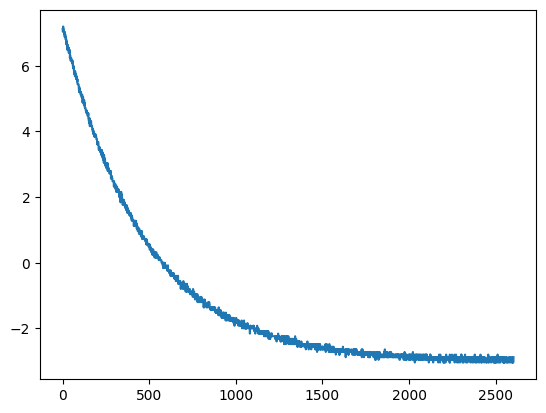

In [18]:
t, V = np.transpose(np.loadtxt(file, skiprows=16, delimiter=",", usecols=(0, 1)))

# start = np.where(V == V.max())[0][0]
start = selectStart(t, V)
end = np.where(V == V.min())[0][0]

V = V[start:end]
t = t[start:end]
t = np.linspace(0, t[-1] - t[0], len(V))

plt.plot(V)

V0 =  10, tau =  4.697e-06, c = -3


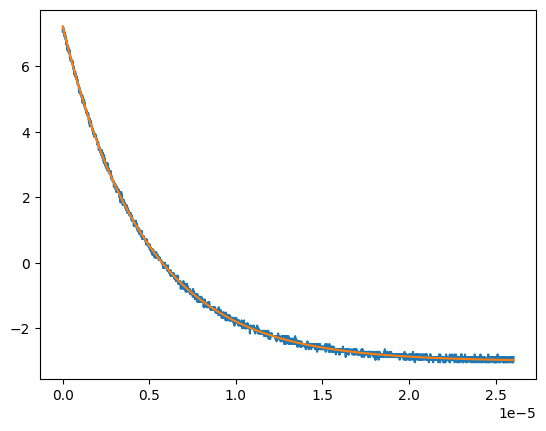

In [19]:
def fit(t, V0, tau, c):
    return V0 * np.exp(-t / tau) + c


a, cov = curve_fit(fit, t, V, p0=(6, 0.03, -2))

plt.plot(t, V)
plt.plot(t, fit(t, *a))
print(f"V0 = {a[0] : .2g}, tau = {a[1] : .4g}, c = {a[2] : .2g}")
tau = ufloat(a[1], np.sqrt(np.diag(cov))[1])


In [20]:
tau

4.697157493984587e-06+/-4.770179739325534e-09

In [21]:
print(f"{tau / R * 10**12:.6g} pF")

9.43204+/-0.00958 pF


In [265]:
np.where(t == t.max())[0][0]


6990

# Single 1nF
1Mohm:0.00169455026
498kohm:0.0004816336163887139
# parallel 1nF 22pF
1Mohm:0.000493938801200100
498kohm:0.0009485933199228385

Time constant: 498 kohm resistor, 1nF capacitor: 0.00190374966727

498kohm resistor, 1nF and 22(?) pF in parralel
0.00169455026

In [233]:
ufloat(194.554, 0.214) - ufloat(190.973, 0.181)

3.580999999999989+/-0.28028021692584726